## Analysing individual inventories

**Note**: This tutorial follows and depends on the tutorials on [Reading PageXML files from archives](./Demo-reading-pagexml-files-from-archive.ipynb) and [Gathering scan characteristics](./Demo-analysing-scan-characteristics.ipynb). It assumes you 1) have downloaded the PageXML archives, 2) derived line format files from them, and 3) derived document statistics per scan and stored them in a TSV file. 

This tutorial focuses on analysing a single large inventory of 672 scans.

As an example of a zipped archive, this tutorial uses a dataset provided by the [National Archives of the Netherlands](https://www.nationaalarchief.nl/en) (NA) via their HTR repository on [Zenodo](https://zenodo.org/): https://zenodo.org/record/6414086#.Y8Elk-zMIUo. The repository contains many other HTR PageXML datasets that NA made available.

The dataset contains HTR output in [PageXML](https://www.primaresearch.org/tools/PAGELibraries) format of scans from the following archive: 
- (medium) _Verspreide West-Indische stukken, 1614-1875, 1.05.06, 1-1413_ ([EAD](https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/%401?query=1.05.06&search-type=inventory)). This is an archive maintained by the [Nationaal Archief](https://www.nationaalarchief.nl/en). 

You can download the datasets via the following URLs:
- https://zenodo.org/record/6414086/files/HTR%20results%201.05.06%20PAGE.zip?download=1


We start with loading the document statistics per scan that was generated in the [Gathering scan characteristics](./Demo-analysing-scan-characteristics.ipynb) tutorial. 

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme()

stats_file = '../data/na_scan_stats.tsv.gz'

df = pd.read_csv(stats_file, sep='\t', compression='gzip', index_col=False)

In [4]:
df.head(5)

,doc_id,doc_num,doc_width,doc_height,lines,words,text_regions,columns,extra,pages,...,line_width_range_0-600,line_width_range_600-800,line_width_range_800-1300,line_width_range_1300-1600,line_width_range_1600-,archive_id,inv_num,scan_num,num_scans,iiif_url
0,NL-HaNA_1.05.06_1_0001.jpg,1,2522,3957,33,165,1,0,0,0,...,4,0,2,0,27,1.05.06,1,1,5,https://www.nationaalarchief.nl/onderzoeken/ar...
1,NL-HaNA_1.05.06_1_0002.jpg,2,4861,3963,59,286,2,0,0,0,...,3,0,0,2,54,1.05.06,1,2,5,https://www.nationaalarchief.nl/onderzoeken/ar...
2,NL-HaNA_1.05.06_1_0003.jpg,3,4886,3960,54,263,2,0,0,0,...,2,0,4,1,47,1.05.06,1,3,5,https://www.nationaalarchief.nl/onderzoeken/ar...
3,NL-HaNA_1.05.06_1_0004.jpg,4,4882,3955,0,0,0,0,0,0,...,0,0,0,0,0,1.05.06,1,4,5,https://www.nationaalarchief.nl/onderzoeken/ar...
4,NL-HaNA_1.05.06_1_0005.jpg,5,2493,3964,0,0,0,0,0,0,...,0,0,0,0,0,1.05.06,1,5,5,https://www.nationaalarchief.nl/onderzoeken/ar...


The `inv_num` column contains the inventory number of each scan. A count shows how many scans there are per inventory:

In [2]:
df.inv_num.value_counts()

44       672
1167     583
45       488
1182     448
812      416
        ... 
525        2
1148       2
1388       2
905        2
1360A      2
Name: inv_num, Length: 533, dtype: int64

Let's zoom in on inventory 44, which has 672 scans.

In [3]:
inv_44 = df[df.inv_num == '44']

inv_44.describe()

,doc_num,doc_width,doc_height,lines,words,text_regions,columns,extra,pages,num_words,...,num_words_length_20,num_words_length_25,num_words_length_30,line_width_range_0-600,line_width_range_600-800,line_width_range_800-1300,line_width_range_1300-1600,line_width_range_1600-,scan_num,num_scans
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0,672.0,672.0,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0
mean,9220.500000,5022.626488,4010.480655,59.645833,385.995536,2.389881,0.0,0.0,0.0,385.995536,...,0.950893,0.010417,0.002976,5.747024,0.909226,15.504464,7.008929,30.086310,336.500000,672.0
std,194.133974,201.025038,92.969233,28.521169,216.081617,1.358229,0.0,0.0,0.0,216.081617,...,1.316738,0.101605,0.054514,6.375366,1.366767,25.416823,17.015551,27.340732,194.133974,0.0
min,8885.000000,2587.000000,2754.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,672.0
25%,9052.750000,4937.000000,3936.000000,45.000000,262.000000,2.000000,0.0,0.0,0.0,262.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,168.750000,672.0
50%,9220.500000,5059.500000,4037.000000,65.000000,363.000000,2.000000,0.0,0.0,0.0,363.000000,...,1.000000,0.000000,0.000000,4.000000,0.000000,2.500000,1.000000,28.000000,336.500000,672.0
75%,9388.250000,5116.000000,4060.000000,75.000000,522.500000,3.000000,0.0,0.0,0.0,522.500000,...,1.000000,0.000000,0.000000,8.000000,1.000000,12.000000,3.000000,54.000000,504.250000,672.0
max,9556.000000,5281.000000,4262.000000,141.000000,964.000000,11.000000,0.0,0.0,0.0,964.000000,...,9.000000,1.000000,1.000000,44.000000,13.000000,102.000000,106.000000,81.000000,672.000000,672.0


### Book section detection

One way to get insight in how a book is structure is to plot the number of words and lines per scan using the book order. Below these are plotted as scatter plots.

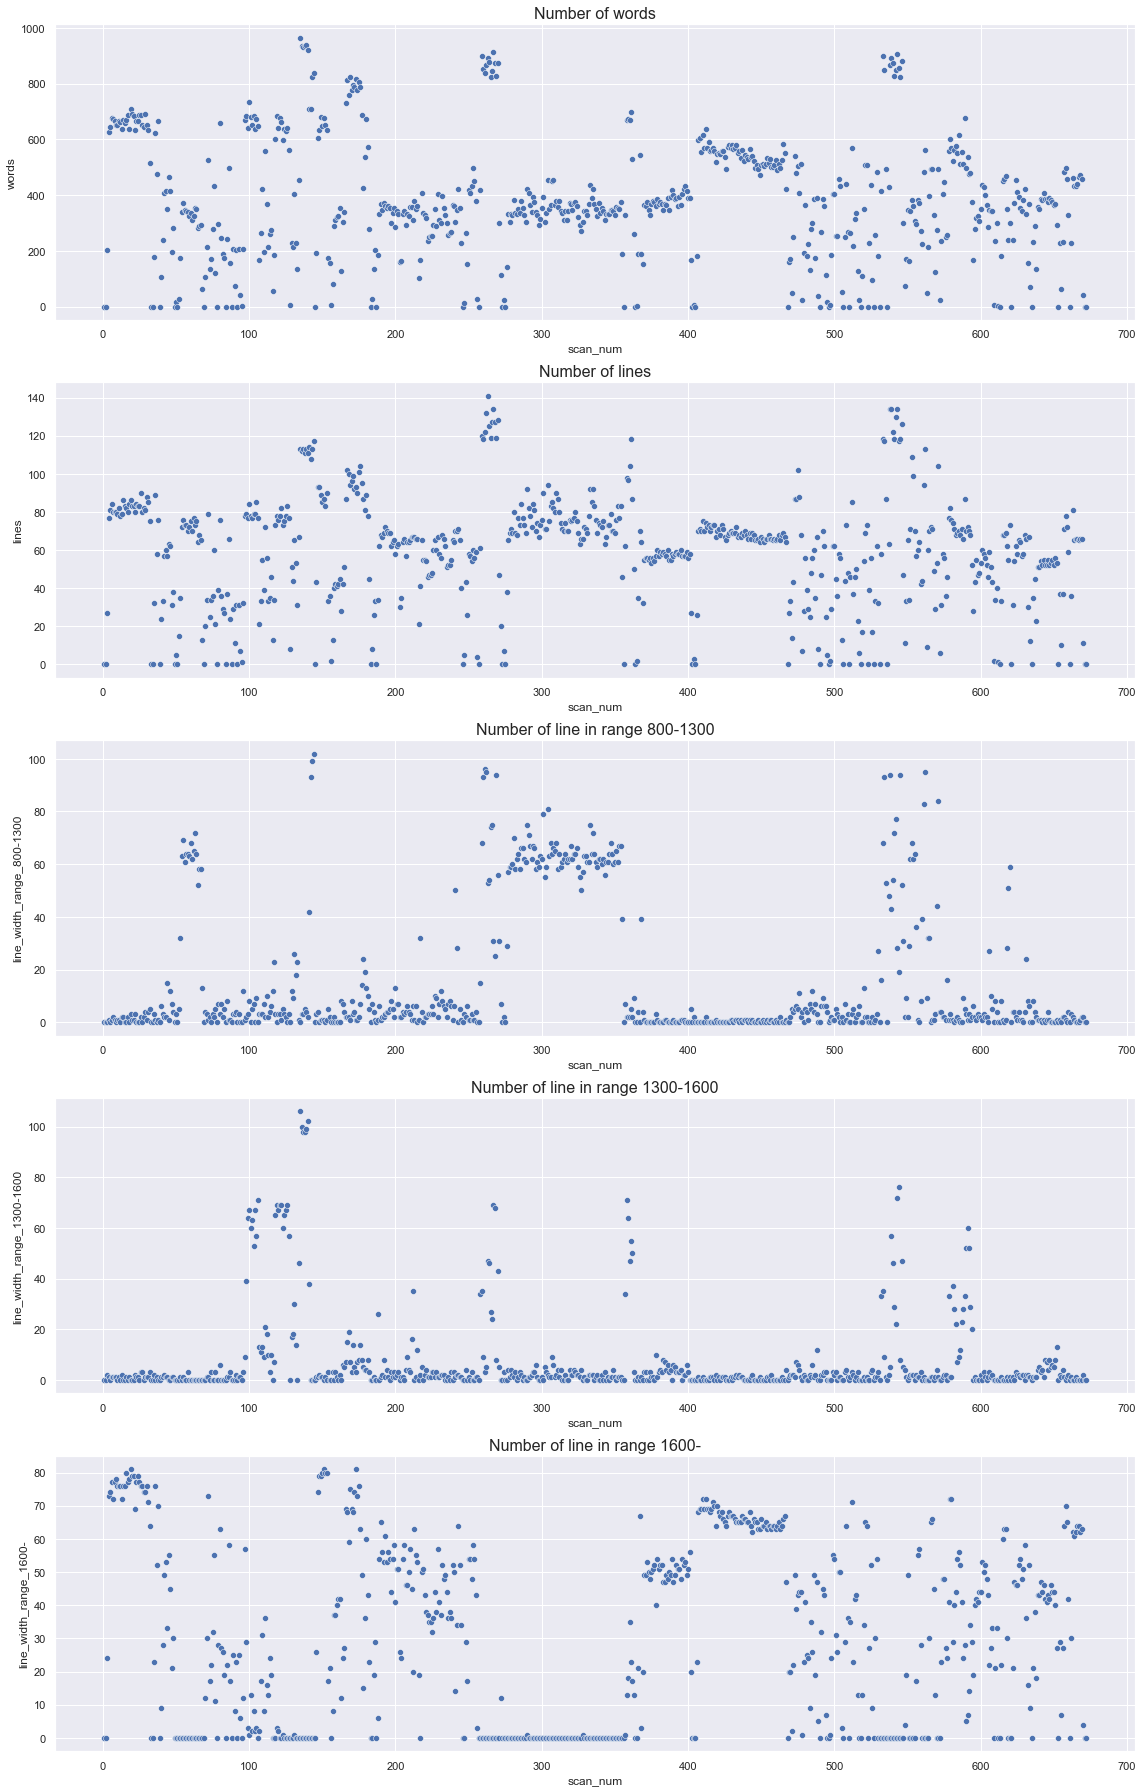

In [8]:
import matplotlib.pyplot as plt

fields = [
    'words', 'lines', 
    'line_width_range_800-1300', 
    'line_width_range_1300-1600', 
    'line_width_range_1600-'
]

fig, ax = plt.subplots(len(fields), 1)

for fi, field in enumerate(fields):
    sns.scatterplot(data=inv_44, x='scan_num', y=field, ax=ax[fi])
    ax[fi].set_title(f"Number of {field.replace('_', ' ').replace('width', 'in')}", fontsize=16)

fig.set_size_inches(16,5*len(fields))
fig.tight_layout()


There seems to be a strong contrast between the plots of the latter two line width categories. That is, scans with a high number of lines in one category seem to have a low number in the other category. This might point at different types of scans, where each type has predominantly lines in one of the two categories.

We can make a scatter plot of these two line width categories to confirm this:

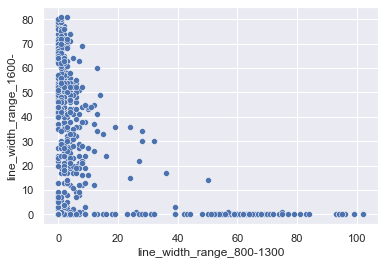

In [27]:
sns.scatterplot(data=inv_44, x='line_width_range_800-1300', y='line_width_range_1600-');

The two categories of line widths are almost mutually exclusive. Scans with at least some lines between 800 and 1300 pixels tend to have _no_ lines wider than 1600 pixels.

There are also many empty pages. Listing them with clickable viewer URLs allows us to see what these scans represent.

In [12]:
# https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/1/file/NL-HaNA_1.05.06_1_0001?eadID=1.05.06&unitID=1&query=1.05.06
def make_iiif_url(row):
    base_url = 'https://www.nationaalarchief.nl/onderzoeken/archief'
    return f"{base_url}/{row['archive_id']}/invnr/{row['inv_num']}/file/{row['doc_id'][:-4]}?eadId={row['archive_id']}&unitID={row['inv_num']}"


def make_clickable(val):
    return f'<a target="_blank" href="{val}">{val}</a>'


inv_44[inv_44.num_words < 20][['num_words', 'scan_num', 'iiif_url']].head(10).style.format({'iiif_url': make_clickable})

,num_words,scan_num,iiif_url
8884,0,1,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0001?eadId=1.05.06&unitID=44
8885,0,2,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0002?eadId=1.05.06&unitID=44
8916,0,33,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0033?eadId=1.05.06&unitID=44
8917,0,34,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0034?eadId=1.05.06&unitID=44
8922,0,39,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0039?eadId=1.05.06&unitID=44
8932,0,49,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0049?eadId=1.05.06&unitID=44
8933,16,50,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0050?eadId=1.05.06&unitID=44
8934,0,51,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0051?eadId=1.05.06&unitID=44
8952,0,69,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0069?eadId=1.05.06&unitID=44
8961,0,78,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0078?eadId=1.05.06&unitID=44


It seems that these empty scans mostly are boundaries between individual documents that are bundled together in this single inventory. **Empty scans** can thus be a useful signal to detect boundaries between documents. 

The scatter plots with the numbers of lines and words per scan also show several _sequences_ of pages with roughly the same number of lines and words (e.g. from around 280 to 350). These might be sections of similar pages within a larger book.

In [14]:
inv_44[(inv_44.scan_num >= 280) & (inv_44.scan_num <= 350)][['doc_id', 'iiif_url']].style.format({'iiif_url': make_clickable})


,doc_id,iiif_url
9163,NL-HaNA_1.05.06_44_0280.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0280?eadId=1.05.06&unitID=44
9164,NL-HaNA_1.05.06_44_0281.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0281?eadId=1.05.06&unitID=44
9165,NL-HaNA_1.05.06_44_0282.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0282?eadId=1.05.06&unitID=44
9166,NL-HaNA_1.05.06_44_0283.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0283?eadId=1.05.06&unitID=44
9167,NL-HaNA_1.05.06_44_0284.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0284?eadId=1.05.06&unitID=44
9168,NL-HaNA_1.05.06_44_0285.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0285?eadId=1.05.06&unitID=44
9169,NL-HaNA_1.05.06_44_0286.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0286?eadId=1.05.06&unitID=44
9170,NL-HaNA_1.05.06_44_0287.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0287?eadId=1.05.06&unitID=44
9171,NL-HaNA_1.05.06_44_0288.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0288?eadId=1.05.06&unitID=44
9172,NL-HaNA_1.05.06_44_0289.jpg,https://www.nationaalarchief.nl/onderzoeken/archief/1.05.06/invnr/44/file/NL-HaNA_1.05.06_44_0289?eadId=1.05.06&unitID=44


It turns out that there's a book that starts at scan number 274 with a section of homogeneous pages that continues until scan number 356 (which is empty), after which another set of homogeneous pages starts, but which have wider text lines.